In [1]:
from diff_calc import mathLexer
from diff_parse import mathParser
from IPython.display import display

Parser debugging for mathParser written to parser.out


In [2]:
expression = "def bol(x) {sin(x)+1} def sol(x) {bol(x)+1+2} {diff y} {bol(x*2) + sol(x) + sin(x)} "

# как добавить diff_arg в код, и как считывать его
# нужно ли обрабатывать нули и 1 и где это делать

In [3]:
lexer  = mathLexer()
parser = mathParser()

In [4]:
for token in lexer.tokenize(expression):
    print(token)

Token(type='DEF', value='def', lineno=1, index=0)
Token(type='ID', value='bol', lineno=1, index=4)
Token(type='(', value='(', lineno=1, index=7)
Token(type='ID', value='x', lineno=1, index=8)
Token(type=')', value=')', lineno=1, index=9)
Token(type='{', value='{', lineno=1, index=11)
Token(type='SIN', value='sin', lineno=1, index=12)
Token(type='(', value='(', lineno=1, index=15)
Token(type='ID', value='x', lineno=1, index=16)
Token(type=')', value=')', lineno=1, index=17)
Token(type='PLUS', value='+', lineno=1, index=18)
Token(type='NUMBER', value=1, lineno=1, index=19)
Token(type='}', value='}', lineno=1, index=20)
Token(type='DEF', value='def', lineno=1, index=22)
Token(type='ID', value='sol', lineno=1, index=26)
Token(type='(', value='(', lineno=1, index=29)
Token(type='ID', value='x', lineno=1, index=30)
Token(type=')', value=')', lineno=1, index=31)
Token(type='{', value='{', lineno=1, index=33)
Token(type='ID', value='bol', lineno=1, index=34)
Token(type='(', value='(', lineno=1

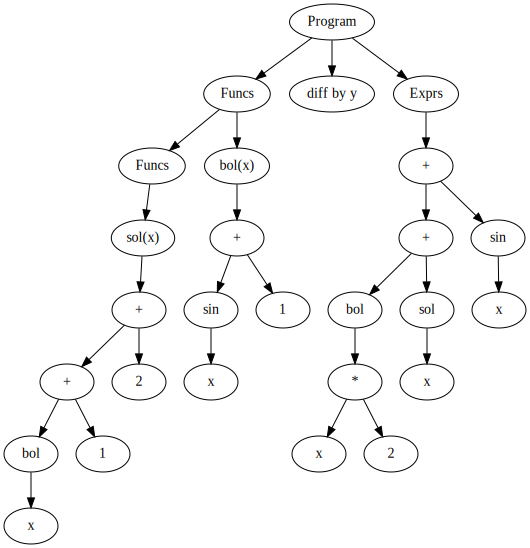

In [5]:
result = parser.parse(lexer.tokenize(expression))
result.dot

In [6]:
result.exprs.expr.funcs

{'bol': <ast_nodes.Func at 0x18be1f0>, 'sol': <ast_nodes.Func at 0x18be7f0>}

In [7]:
result.funcs.func

In [8]:
exec_result = result.exec()

In [9]:
exec_result['python_exprs']

['((((sin(x))+1)+((((sin(x))+1)+1)+2))+(sin(x)))']

In [10]:
exec_result['diff_exprs']

['(cos(x)*0+cos(x)*1*0)']